# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high.

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel('Final_Train.xlsx')
df2 = pd.read_excel('Final_Test.xlsx')

Here there are two dataset present one for only trainig and other for testing

In [4]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [5]:
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [6]:
df1['Qualification'].value_counts()

BDS                                                                                                    488
BHMS                                                                                                   477
BAMS                                                                                                   471
MBBS                                                                                                   334
MBBS, MS - ENT                                                                                         220
                                                                                                      ... 
BDS, MDS - Prosthodontics, Fellowship in Implantology, Certified BPS Dentist                             1
MS - ENT, DNB - ENT, MRCS (UK), Diploma in Otorhinolaryngology (DLO), MASLP, FRCS - General Surgery      1
BSc, BDS, Diploma in Laser Dentistry                                                                     1
MBBS, MS - Otorhinolaryngology, Fello

In [7]:
df1.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

In [8]:
df1.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
df1.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

data set contain null values . we have to remove the null values

In [11]:
df2.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

testing data set also contain null values

In [12]:
df1["Miscellaneous_Info"].fillna("unknown",inplace=True)#replacing null values with unknown 

In [13]:
df2["Miscellaneous_Info"].fillna("unknown",inplace=True)#replacing null values with unknown 

In [14]:
df1["Experience"]=df1["Experience"].str.strip("  years experience")

here we are removing the string kind of value from the column

In [15]:
df2["Experience"]=df2["Experience"].str.strip("  years experience")

here we are removing the string kind of value from the column

In [16]:
df2["Experience"]

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: object

In [17]:
df1["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: object

In [18]:
df1["Experience"]=df1["Experience"].astype(int)
df2["Experience"]=df2["Experience"].astype(int)

here we are converting the column to int type

In [19]:
df1.dtypes

Qualification         object
Experience             int32
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [20]:
def Placetop(x):
    top=str(x).split(' ')
    return top[-1]

Here we are defining the function to split the places

In [21]:
temp=df1[df1['Place'].notnull()]

In [22]:
temp['Place']=temp['Place'].apply(Placetop)

<ipython-input-22-1f3a6ae9ea73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Place']=temp['Place'].apply(Placetop)


In [23]:
temp['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [24]:
temp[temp['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
3980,BDS,23,NaN,e,Dentist,unknown,250


In [25]:
df1['Place'].fillna('Malleshwaram, Bangalore', inplace=True)

In [26]:
df1['Place']=df1['Place'].apply(Placetop)

In [27]:
def remove(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [28]:
df1['Place']=df1['Place'].apply(remove)

In [29]:
df1['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [30]:
df2['Place'].fillna('Malleshwaram, Bangalore', inplace=True)

In [31]:
df2['Place']=df2['Place'].apply(Placetop)

In [32]:
df2['Place'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              2659 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 302.8+ KB


In [34]:
def qualificationch(x):
    spa=x.split(' ')
    dots=x.split(',')
    
    if ',' not in x:
        return spa[0]
    else:
        return dots[0]

here we are defining the function for splitting the qualification

In [35]:
df1['Qualification']=df1['Qualification'].apply(qualificationch)

In [36]:
def removeminus(x):
    tabs=x.split('-')
    if '-' in x:
        return tabs[0]
    else:
        return x

In [37]:
df1['Qualification']=df1['Qualification'].apply(remove)

In [38]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,NaN,Bangalore,ENT Specialist,unknown,300
3,BSc - Zoology,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98%,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,Chennai,General Medicine,unknown,100
5958,MBBS,41,97%,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90%,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [39]:
df1['Qualification'].value_counts()

MBBS                                                        2448
BDS                                                         1208
BAMS                                                         711
BHMS                                                         706
MD - Dermatology                                              84
                                                            ... 
Diplomate of National Board Exam                               1
Diploma in Medical Trichology                                  1
M.Ch                                                           1
Diploma in Skin & Vinereal Disease                             1
Fellowship and Diplomate in Implantology from ICOI (USA)       1
Name: Qualification, Length: 153, dtype: int64

In [40]:
df2['Qualification']=df2['Qualification'].apply(qualificationch)

In [41]:
df2['Qualification']=df2['Qualification'].apply(removeminus)

In [42]:
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,Mumbai,General Medicine,unknown
1,MBBS,31,NaN,Hyderabad,ENT Specialist,unknown
2,MBBS,40,70%,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,Delhi,Ayurveda,unknown
4,BDS,16,100%,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,BAMS,10,NaN,Bangalore,Ayurveda,unknown
1983,MD,4,NaN,Chennai,Dermatologists,unknown
1984,MBBS,9,NaN,Chennai,General Medicine,unknown
1985,BDS,12,98%,Bangalore,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [43]:
df2['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
DNB                                                                     13
DDVL                                                                    13
MDS                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
Get                                                                      6
Diploma in Otorhinolaryng

In [44]:
def qua(x):
    dib=x.strip('.')
    tob=dib.lower()
    list1=['bsc','diploma','certifi','doctor']
    if list1[0] in tob:
        return 'BSC'
    elif list1[1] in tob:
        return 'Diploma'
    elif list1[2] in tob:
        return 'Certfication'
    elif list1[3] in tob:
        return 'PhD'
    else:
        return x

we are defining the function for grouping the qualification degrees

In [45]:
df1['Qualification']=df1['Qualification'].apply(qua)

In [46]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,NaN,Bangalore,ENT Specialist,unknown,300
3,BSC,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98%,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,Chennai,General Medicine,unknown,100
5958,MBBS,41,97%,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90%,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [47]:
df2['Qualification']=df2['Qualification'].apply(qua)

In [48]:
df2['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
DDVL                                          13
MDS                                           13
DNB                                           13
B.Sc                                           6
Get                                            6
BSC                                            5
MS                                             5
LCEH                                           5
DHMS                                           4
Certfication                                   3
DM                                             2
BSAM                

In [49]:
df1[df1['Fees']>800]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
275,MD - Dermatology,6,NaN,Delhi,Dermatologists,unknown,900
293,MBBS,29,100%,Chennai,General Medicine,"100% 175 Feedback Adyar, Chennai",950
987,MBBS,25,93%,Delhi,ENT Specialist,Nasofriboscopia Nasal Disorders Labyrinthitis,900
1314,MBBS,33,100%,Mumbai,General Medicine,"100% 4 Feedback Mira-Bhayandar Road, Mumbai",900
1631,MBBS,6,NaN,Mumbai,Dermatologists,unknown,900
2165,MBBS,8,100%,Mumbai,General Medicine,"100% 29 Feedback Kandivali West, Mumbai",900
2252,MBBS,46,95%,Bangalore,ENT Specialist,"95% 3 Feedback Richmond Town, Bangalore",900
2393,BHMS,19,100%,Mumbai,Homeopath,"100% 18 Feedback Mulund West, Mumbai",900
2428,MA - Psychology,6,NaN,Delhi,Homeopath,Skin Allergy Treatment OCD Skin Allergies,900
2522,BHMS,27,98%,Mumbai,Homeopath,Skin Disease Treatment Kidney Stone Treatment ...,900


In [50]:
df1[df1['Fees']>800]['Profile'].value_counts()

General Medicine    7
Dermatologists      5
Homeopath           4
ENT Specialist      3
Dentist             1
Ayurveda            1
Name: Profile, dtype: int64

general medicine doctors are getting more fees than others

In [51]:
df1.dtypes

Qualification         object
Experience             int32
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [52]:
rat =df1[df1['Rating'].notnull()]

In [53]:
rat.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100%,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98%,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
4,BAMS,20,100%,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
7,BDS,10,99%,Bangalore,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
12,BDS,9,98%,Coimbatore,Dentist,"98% 14 Feedback Coimbatore Racecourse, Coimbatore",200


In [54]:
df1['Rating']=df1['Rating'].str.strip('%')

In [55]:
df1['Rating']=df1["Rating"].astype(float)

In [56]:
df1['Rating'].fillna(0,inplace=True)

In [57]:
df1['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

more doctors presnt sre dentist

In [58]:
df1['Rating']=df1['Rating'].astype(int)

In [59]:
df1.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            22.795165
Dentist             61.617037
Dermatologists      57.695358
ENT Specialist      37.296703
General Medicine    30.452685
Homeopath           29.811388
Name: Rating, dtype: float64

In [60]:
def frat(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):
        
        if Profile == 'Ayurveda':
            return '96'
        
        elif Profile == 'Dentist':
            return '98'
        elif Profile == 'Dermatologists':
            return '94'
        elif Profile == 'ENT Specialist':
            return '89'
        elif Profile == 'General Medicinet':
            return '92'
        elif Profile == 'Homeopath':
            return '97'
    else:
        return Rating

here we are defining the function for rearranging the data

In [61]:
df1['Rating']=df1[['Rating','Profile']].apply(frat,axis=1)


In [62]:
df2['Rating']=df2['Rating'].str.strip('%')

In [63]:
df2['Rating']=df2["Rating"].astype(float)

In [64]:
df2['Rating'].fillna(0,inplace=True)

In [65]:
rats =df2[df2['Rating'].notnull()]

In [66]:
rats.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0.0,Mumbai,General Medicine,unknown
1,MBBS,31,0.0,Hyderabad,ENT Specialist,unknown
2,MBBS,40,70.0,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0.0,Delhi,Ayurveda,unknown
4,BDS,16,100.0,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...


In [67]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,0,Bangalore,ENT Specialist,unknown,300
3,BSC,12,0,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,Chennai,General Medicine,unknown,100
5958,MBBS,41,97,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [68]:
df2['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [69]:
df2['Rating']=df2['Rating'].astype(int)

In [70]:
rats.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            24.127490
Dentist             62.680272
Dermatologists      57.498525
ENT Specialist      40.068085
General Medicine    30.957207
Homeopath           30.191336
Name: Rating, dtype: float64

In [71]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,0,Bangalore,ENT Specialist,unknown,300
3,BSC,12,0,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,Chennai,General Medicine,unknown,100
5958,MBBS,41,97,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [72]:
def tfrat(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):
        
        if Profile == 'Ayurveda':
            return '96'
        
        elif Profile == 'Dentist':
            return '98'
        elif Profile == 'Dermatologists':
            return '93'
        elif Profile == 'ENT Specialist':
            return '88'
        elif Profile == 'General Medicinet':
            return '93'
        elif Profile == 'Homeopath':
            return '96'
    else:
        return Rating

In [73]:
df2['Rating']=df2[['Rating','Profile']].apply(tfrat,axis=1)

In [74]:
df2['Rating']=df2['Rating'].astype(int)

In [75]:
df1['Rating']=df1['Rating'].astype(int)

In [76]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,0,Bangalore,ENT Specialist,unknown,300
3,BSC,12,0,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,Chennai,General Medicine,unknown,100
5958,MBBS,41,97,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [77]:
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0,Mumbai,General Medicine,unknown
1,MBBS,31,0,Hyderabad,ENT Specialist,unknown
2,MBBS,40,70,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0,Delhi,Ayurveda,unknown
4,BDS,16,100,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,BAMS,10,0,Bangalore,Ayurveda,unknown
1983,MD,4,0,Chennai,Dermatologists,unknown
1984,MBBS,9,0,Chennai,General Medicine,unknown
1985,BDS,12,98,Bangalore,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [78]:
df1.dtypes

Qualification         object
Experience             int32
Rating                 int32
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [79]:
df2.dtypes

Qualification         object
Experience             int32
Rating                 int32
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int32 
 2   Rating              5961 non-null   int32 
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int32(2), int64(1), object(4)
memory usage: 279.5+ KB


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   int32 
 2   Rating              1987 non-null   int32 
 3   Place               1987 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1987 non-null   object
dtypes: int32(2), object(4)
memory usage: 77.7+ KB


In [82]:
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,0,Bangalore,ENT Specialist,unknown,300
3,BSC,12,0,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,Chennai,General Medicine,unknown,100
5958,MBBS,41,97,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,15,90,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [83]:
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,0,Mumbai,General Medicine,unknown
1,MBBS,31,0,Hyderabad,ENT Specialist,unknown
2,MBBS,40,70,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,0,Delhi,Ayurveda,unknown
4,BDS,16,100,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,BAMS,10,0,Bangalore,Ayurveda,unknown
1983,MD,4,0,Chennai,Dermatologists,unknown
1984,MBBS,9,0,Chennai,General Medicine,unknown
1985,BDS,12,98,Bangalore,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [90]:
df1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [91]:
df2.drop('Miscellaneous_Info',axis=1,inplace=True)

In [92]:
df1

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,Ernakulam,Homeopath,100
1,BAMS,12,98,Bangalore,Ayurveda,350
2,MBBS,9,0,Bangalore,ENT Specialist,300
3,BSC,12,0,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,300
5957,MBBS,33,0,Chennai,General Medicine,100
5958,MBBS,41,97,Delhi,General Medicine,600
5959,MBBS,15,90,Mumbai,General Medicine,100


In [93]:
df2

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,0,Mumbai,General Medicine
1,MBBS,31,0,Hyderabad,ENT Specialist
2,MBBS,40,70,Chennai,Dermatologists
3,BAMS,0,0,Delhi,Ayurveda
4,BDS,16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,BAMS,10,0,Bangalore,Ayurveda
1983,MD,4,0,Chennai,Dermatologists
1984,MBBS,9,0,Chennai,General Medicine
1985,BDS,12,98,Bangalore,Dentist


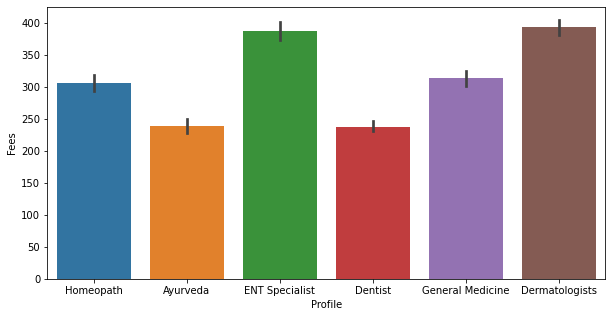

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df1)

ENT specialist and Dermotoligisr are getting more fees than others

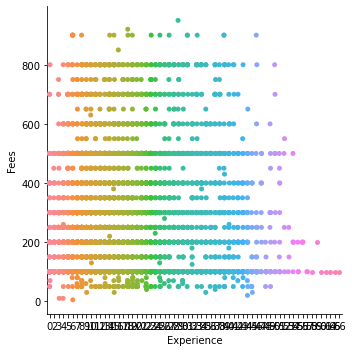

In [97]:
sns.catplot(x='Experience',y='Fees',data=df1)

more experienced is not necesserly getting more fees

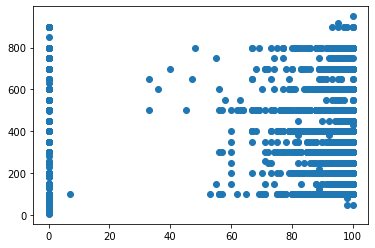

In [98]:
plt.scatter(df1['Rating'],df1['Fees'])

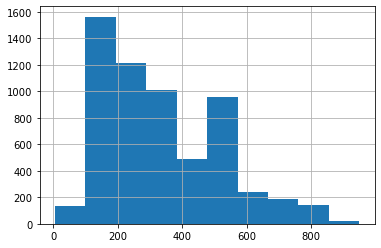

In [102]:
df1['Fees'].hist()

most of the doctors are getting 100 - 200 fees

In [103]:
df1

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,Ernakulam,Homeopath,100
1,BAMS,12,98,Bangalore,Ayurveda,350
2,MBBS,9,0,Bangalore,ENT Specialist,300
3,BSC,12,0,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,MBBS,19,98,Bangalore,ENT Specialist,300
5957,MBBS,33,0,Chennai,General Medicine,100
5958,MBBS,41,97,Delhi,General Medicine,600
5959,MBBS,15,90,Mumbai,General Medicine,100


In [104]:
df2

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,0,Mumbai,General Medicine
1,MBBS,31,0,Hyderabad,ENT Specialist
2,MBBS,40,70,Chennai,Dermatologists
3,BAMS,0,0,Delhi,Ayurveda
4,BDS,16,100,Bangalore,Dentist
...,...,...,...,...,...
1982,BAMS,10,0,Bangalore,Ayurveda
1983,MD,4,0,Chennai,Dermatologists
1984,MBBS,9,0,Chennai,General Medicine
1985,BDS,12,98,Bangalore,Dentist


In [106]:
df1.skew()

Experience    0.991089
Rating        0.247186
Fees          0.751870
dtype: float64

In [107]:
df2.skew()

Experience    0.963447
Rating        0.225321
dtype: float64

In [108]:
skew=['Experience','Rating','Fees']

In [110]:
import numpy as np

In [111]:
for col in skew:
    if df1.skew().loc[col]>0.55:
        df1[col] = np.log1p(df1[col])

In [112]:
skew2=['Experience','Rating']

In [116]:
for col in skew2:
    if df2.skew().loc[col]>0.55:
        df2[col] = np.log(df2[col])

In [114]:
df1.skew()

Experience   -0.895198
Rating        0.247186
Fees         -0.298173
dtype: float64

In [117]:
df2.skew()

Experience   -0.960229
Rating        0.225321
dtype: float64

In [118]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [120]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [122]:
for i in df2.columns:
    if df2[i].dtypes=="object":
        df2[i]=enc.fit_transform(df2[i].values.reshape(-1,1))

In [123]:
df1

,Qualification,Experience,Rating,Place,Profile,Fees
0,7.0,3.218876,100,4.0,5.0,4.615121
1,4.0,2.564949,98,0.0,0.0,5.860786
2,59.0,2.302585,0,0.0,3.0,5.707110
3,10.0,2.564949,0,0.0,0.0,5.525453
4,4.0,3.044522,100,1.0,0.0,5.525453
...,...,...,...,...,...,...
5956,59.0,2.995732,98,0.0,3.0,5.707110
5957,59.0,3.526361,0,1.0,4.0,4.615121
5958,59.0,3.737670,97,3.0,4.0,6.398595
5959,59.0,2.772589,90,6.0,4.0,4.615121


In [124]:
df2

,Qualification,Experience,Rating,Place,Profile
0,29.0,3.583519,0,6.0,4.0
1,29.0,3.465736,0,5.0,3.0
2,29.0,3.713572,70,1.0,2.0
3,1.0,0.000000,0,3.0,0.0
4,2.0,2.833213,100,0.0,1.0
...,...,...,...,...,...
1982,1.0,2.397895,0,0.0,0.0
1983,31.0,1.609438,0,1.0,2.0
1984,29.0,2.302585,0,1.0,4.0
1985,2.0,2.564949,98,0.0,1.0


Qualification       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Experience       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Rating           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Place               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Profile          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Fees             AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

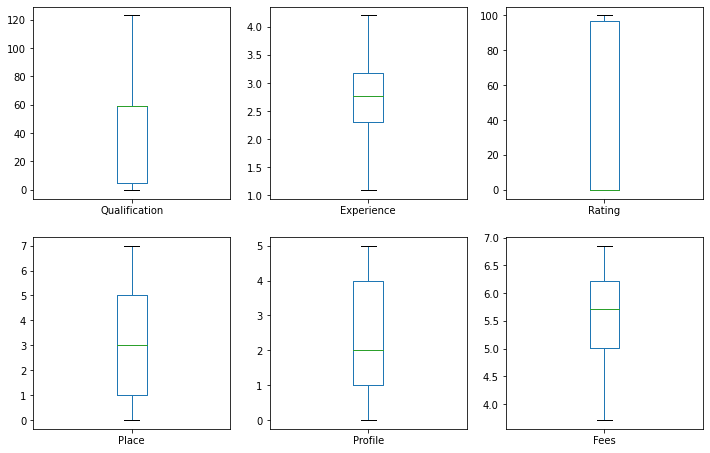

In [176]:
df1.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False, subplots=True)

Qualification       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Experience       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Rating           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Place               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Profile          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

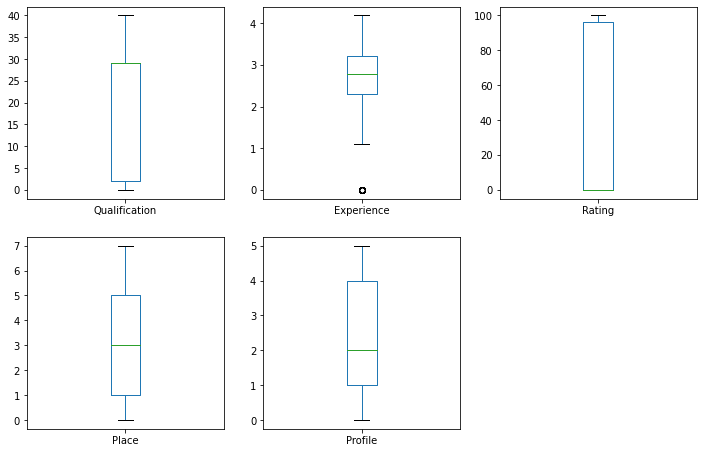

In [126]:
df2.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False, subplots=True)

In [127]:
from scipy.stats import zscore

In [129]:
z = np.abs(zscore(df1))
print(z)

[[0.98316629 0.74459804 1.22066882 0.41562874 1.54301587 1.33145457]
 [1.08282994 0.20043453 1.17841853 1.32453836 1.47289258 0.4975396 ]
 [0.74433691 0.57959456 0.89184525 1.32453836 0.33665249 0.27189926]
 ...
 [0.74433691 1.49434141 1.15729339 0.01941304 0.93983418 1.28719688]
 [0.74433691 0.09963891 1.00941741 1.28571229 0.93983418 1.33145457]
 [1.04960873 0.26985499 1.22066882 0.01941304 0.86971089 0.3210027 ]]


In [130]:
treshold = 3
print(np.where(z<3))
print(df1.shape)

(array([   0,    0,    0, ..., 5960, 5960, 5960], dtype=int64), array([0, 1, 2, ..., 3, 4, 5], dtype=int64))
(5961, 6)


In [132]:
df_new=df1[(z<3).all(axis=1)]

In [133]:
df_new.shape

(5866, 6)

In [135]:
df1.shape

(5961, 6)

In [137]:
((5961-5866)/5961)*100

1.5936923335010904

In [138]:
df1 = df_new

In [139]:
z = np.abs(zscore(df2))
print(z)

[[0.85626377 1.22528036 0.90188736 1.31780124 0.90167305]
 [0.85626377 1.05488417 0.90188736 0.87653547 0.29700739]
 [0.85626377 1.41342764 0.57890109 0.88852759 0.30765827]
 ...
 [0.85626377 0.62784087 0.90188736 0.88852759 0.90167305]
 [1.12791449 0.24827967 1.17121647 1.32979336 0.91232393]
 [0.85626377 0.78026546 0.90188736 0.88852759 0.30765827]]


In [140]:
treshold = 3
print(np.where(z<3))
print(df2.shape)

(array([   0,    0,    0, ..., 1986, 1986, 1986], dtype=int64), array([0, 1, 2, ..., 2, 3, 4], dtype=int64))
(1987, 5)


In [142]:
df_new2=df2[(z<3).all(axis=1)]

In [144]:
df_new2.shape

(1956, 5)

In [146]:
df2.shape

(1987, 5)

In [147]:
((1987-1956)/1987)*100

1.560140915953699

In [148]:
df2= df_new2

In [149]:
x2=df2

In [150]:
x1 = df1.drop("Fees",axis =1)
y1=df1['Fees']

In [151]:
x1.dtypes

Qualification    float64
Experience       float64
Rating             int32
Place            float64
Profile          float64
dtype: object

In [152]:
y1.dtypes

dtype('float64')

In [153]:
x1.shape

(5866, 5)

In [154]:
y1.shape

(5866,)

In [155]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x1)
x1 = pd.DataFrame(x1,columns=x1.columns)

In [156]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x2)
x2 = pd.DataFrame(x2,columns=x1.columns)

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=101)

In [185]:
import lightgbm as lgb

In [187]:
params ={
    'boosting_type':'gbdt',
    'objective':'regression',
    'eval_metric':'rmsle',
    'max_depth':7,
    'learning_rate':0.1,
    'verbose':0,
    'early_stopping_round':30}
n_estimators = 700

In [188]:
d_train= lgb.Dataset(x_train, label=y_train)

In [189]:
d_valid = lgb.Dataset(x_test, label=y_test)

In [190]:
watchlist = [d_valid]

In [192]:
model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.424496
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.411276
[3]	valid_0's l2: 0.400635
[4]	valid_0's l2: 0.391948
[5]	valid_0's l2: 0.384879
[6]	valid_0's l2: 0.378825
[7]	valid_0's l2: 0.373413
[8]	valid_0's l2: 0.369132
[9]	valid_0'

In [193]:
preds = model.predict(x2)

In [194]:
preds = np.exp(preds)

In [195]:
Doctor = pd.DataFrame()

In [196]:
Doctor['Fees']=preds

In [197]:
Doctor.to_excel('doctor1.xlsx',index=False)

In [200]:
Doctor.head(30)

,Fees
0,215.029790
1,346.880798
2,317.631324
3,241.682757
4,227.062831
5,428.772712
6,211.360624
7,228.764916
8,211.312493
9,249.569591


In [201]:
prete= model.predict(x_test)

In [202]:
from sklearn.metrics import mean_squared_error

In [204]:
np.sqrt(mean_squared_error(y_test,prete))# checking the mean squred error

0.5852567747185407

we loaded the predicted data in 'doctor1.xlsx' file